In [1]:
#import warnings
#warnings.filterwarnings('ignore')
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 

In [2]:
Data=pd.read_csv('android.csv')

In [3]:
Data

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,41089,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
66,41375,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069,1
67,42485,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
68,43552,0.630,0.000,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652,1


In [4]:
Data.shape

(70, 17)

In [5]:
Data.columns

Index(['name', 'cpu-usage', 'context-switch', 'cpu-migration', 'page-faults',
       'cycles-GHz', 'stalled-cycles-frontend-percent',
       'stalled-cycles-backend-percent', 'Instructions-per-cycle',
       'stalled-cycles-per-instruction', 'branches', 'branch-misses-percent',
       'bus-cycle', 'cache-misses-percent', 'cache-references', 'ref-cycles',
       'malware'],
      dtype='object')

In [6]:
Data.isnull()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
66,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
67,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
Data.isnull().sum()

name                               0
cpu-usage                          0
context-switch                     0
cpu-migration                      0
page-faults                        0
cycles-GHz                         0
stalled-cycles-frontend-percent    0
stalled-cycles-backend-percent     0
Instructions-per-cycle             0
stalled-cycles-per-instruction     0
branches                           0
branch-misses-percent              0
bus-cycle                          0
cache-misses-percent               0
cache-references                   0
ref-cycles                         0
malware                            0
dtype: int64

In [8]:
Data.isnull().any()

name                               False
cpu-usage                          False
context-switch                     False
cpu-migration                      False
page-faults                        False
cycles-GHz                         False
stalled-cycles-frontend-percent    False
stalled-cycles-backend-percent     False
Instructions-per-cycle             False
stalled-cycles-per-instruction     False
branches                           False
branch-misses-percent              False
bus-cycle                          False
cache-misses-percent               False
cache-references                   False
ref-cycles                         False
malware                            False
dtype: bool

In [9]:
Data.dropna()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,41089,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
66,41375,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069,1
67,42485,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
68,43552,0.630,0.000,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652,1


In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             70 non-null     object 
 1   cpu-usage                        70 non-null     float64
 2   context-switch                   70 non-null     float64
 3   cpu-migration                    70 non-null     float64
 4   page-faults                      70 non-null     float64
 5   cycles-GHz                       70 non-null     float64
 6   stalled-cycles-frontend-percent  70 non-null     float64
 7   stalled-cycles-backend-percent   70 non-null     float64
 8   Instructions-per-cycle           70 non-null     float64
 9   stalled-cycles-per-instruction   70 non-null     float64
 10  branches                         70 non-null     float64
 11  branch-misses-percent            70 non-null     float64
 12  bus-cycle               

In [11]:
Data.describe()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,70.000000
mean,0.224857,3.268829,0.200843,22.632400,0.703786,1190.133143,2398.515143,45.230571,0.829714,161444.605486,7.145571,78221.285714,70.325429,13201.262757,1.985734e+06,0.171429
std,0.263227,5.304954,0.318326,19.539722,0.497743,7444.910196,17575.281223,312.370354,0.715005,98600.462833,5.631135,20085.880317,35.977729,5375.939327,3.860305e+05,0.379604
min,0.000000,0.000000,0.000000,0.110000,0.000000,11.070000,12.870000,0.160000,0.070000,182.384000,0.530000,24367.000000,8.980000,13.393000,8.443950e+05,0.000000
25%,0.010250,0.733000,0.000000,8.250000,0.213250,56.160000,43.905000,0.907500,0.422500,93552.000000,2.717500,68212.000000,34.542750,11308.500000,1.786604e+06,0.000000
50%,0.134000,2.000000,0.099500,15.000000,0.793000,140.485000,107.915000,1.335000,0.645000,138971.000000,6.010000,84719.500000,75.459000,13507.000000,2.114808e+06,0.000000
75%,0.363000,4.000000,0.203000,33.000000,1.065500,303.150000,266.022500,4.817500,0.970000,212997.250000,11.165000,93978.000000,106.531000,15498.250000,2.281833e+06,0.000000
max,1.099000,37.000000,2.000000,90.000000,1.664000,62414.160000,147267.450000,2617.310000,4.860000,558519.000000,26.430000,98792.000000,129.192000,28428.000000,2.370923e+06,1.000000


In [12]:
#data.corr()["malware"] cannt use it beacuse "name " is not a integer column

In [13]:
Data_new = Data.sample(frac=1).reset_index(drop=True)

In [14]:
Data_new.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,service,0.670,3.0,2.000,86.0,0.000,62414.16,147267.45,2617.31,0.56,165426.0,12.13,87418,81.558,28428.0,2295638,0
1,18585,0.174,0.0,0.000,19.0,0.867,147.94,126.28,0.96,1.54,65102.0,19.76,86649,78.975,18742.0,2079722,1
2,tail,0.000,8.0,0.709,48.0,0.435,306.47,244.08,2.93,1.05,133311.0,9.37,90670,100.445,15271.0,2176086,0
3,ls,0.579,19.0,0.000,26.0,0.297,359.57,359.34,4.99,0.72,153480.0,7.36,87639,95.313,12128.0,2103360,0
4,browser,0.571,2.0,0.099,15.0,1.368,58.01,47.29,0.75,0.77,214333.0,3.67,73294,30.224,17894.0,1716287,0


In [15]:
Data.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0


In [16]:
import seaborn as sns

<Axes: xlabel='malware', ylabel='count'>

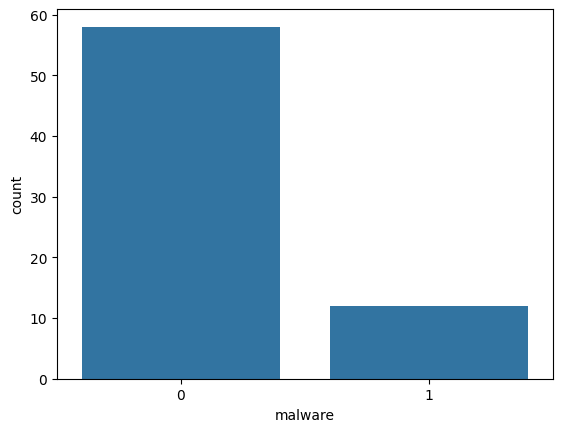

In [17]:
sns.countplot(x='malware',data=Data_new)

***the above graph shows the data is unbalanced , so we want to make it balanced***

1. undersampling
2. oversampling

# oversampling

In [19]:
target_count = Data_new.malware.value_counts()
print(target_count[0])
print(target_count[1])

58
12


In [20]:
target_count

malware
0    58
1    12
Name: count, dtype: int64

In [22]:
count_class_0, count_class_1 = Data_new.malware.value_counts()

In [23]:
df_class_0 = Data_new[Data_new['malware'] == 0]
df_class_1 = Data_new[Data_new['malware'] == 1]

In [24]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


In [25]:
df_test_over.shape

(116, 17)

<Axes: xlabel='malware', ylabel='count'>

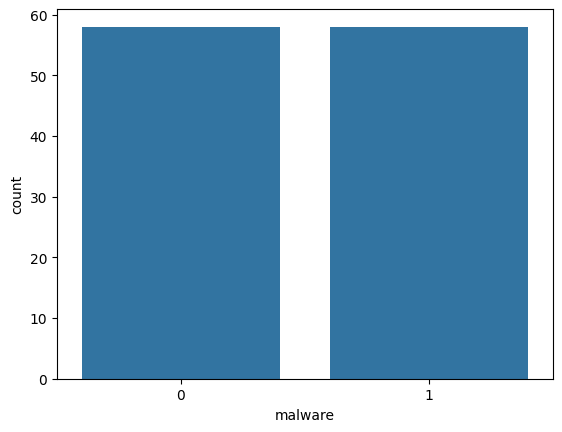

In [26]:
sns.countplot(x='malware',data=df_test_over)

In [27]:
X=df_test_over.iloc[:,df_test_over.columns !='malware']
Y=df_test_over.iloc[:,df_test_over.columns =="malware"]

In [28]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
0,service,0.670,3.0,2.000,86.0,0.000,62414.16,147267.45,2617.31,0.56,165426.0,12.13,87418,81.558,28428.0,2295638
2,tail,0.000,8.0,0.709,48.0,0.435,306.47,244.08,2.93,1.05,133311.0,9.37,90670,100.445,15271.0,2176086
3,ls,0.579,19.0,0.000,26.0,0.297,359.57,359.34,4.99,0.72,153480.0,7.36,87639,95.313,12128.0,2103360
4,browser,0.571,2.0,0.099,15.0,1.368,58.01,47.29,0.75,0.77,214333.0,3.67,73294,30.224,17894.0,1716287
5,spotify,0.370,5.0,0.467,15.0,1.354,63.32,51.43,0.74,0.86,198348.0,3.05,78884,41.534,19218.0,1925909


In [29]:
Y.head()

,malware
0,0
2,0
3,0
4,0
5,0


In [30]:
from sklearn.utils import shuffle

In [31]:
X, Y=shuffle(X, Y)

In [32]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
42,13915,0.577,0.000,0.000,48.0,0.343,384.13,314.11,3.17,1.21,108002.0,12.93,93825,89.487,14077.0,2251821
19,gnome-software,0.883,1.000,0.124,15.0,0.003,1852.55,2496.88,85.32,0.29,35031.0,0.57,24367,8.980,3601.0,877674
69,screensaver,0.755,3.000,0.164,16.0,0.029,293.22,262.39,12.51,0.23,47395.0,1.08,35526,61.085,6970.0,1301211
25,42485,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964
26,ssh,0.022,0.292,0.046,5.0,0.044,214.46,189.88,30.69,0.07,34884.0,3.31,40536,113.177,1051.0,1408932


In [33]:
Y.head()

,malware
42,1
19,0
69,0
25,1
26,0


In [34]:
X=X.drop(columns='name')
X.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
42,0.577,0.000,0.000,48.0,0.343,384.13,314.11,3.17,1.21,108002.0,12.93,93825,89.487,14077.0,2251821
19,0.883,1.000,0.124,15.0,0.003,1852.55,2496.88,85.32,0.29,35031.0,0.57,24367,8.980,3601.0,877674
69,0.755,3.000,0.164,16.0,0.029,293.22,262.39,12.51,0.23,47395.0,1.08,35526,61.085,6970.0,1301211
25,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964
26,0.022,0.292,0.046,5.0,0.044,214.46,189.88,30.69,0.07,34884.0,3.31,40536,113.177,1051.0,1408932


In [35]:
Y.head()

,malware
42,1
19,0
69,0
25,1
26,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [38]:
X_train.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
39,0.062,2.0,0.189,5.0,1.100,48.84,35.02,0.96,0.51,231173.0,2.78,77247,42.083,13365.0,2000843
21,0.696,1.0,0.051,27.0,1.206,47.85,37.77,0.98,0.49,252568.0,6.78,67340,45.405,15504.0,1790055
45,0.001,4.0,0.698,20.0,0.538,164.53,149.01,2.98,0.55,184041.0,7.78,94545,107.235,14219.0,2269099
14,0.630,0.0,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652
9,0.882,4.0,0.300,33.0,0.012,11.07,12.87,0.59,0.22,48230.0,1.19,25984,40.036,5538.0,844395


In [39]:
X_train.shape

(92, 15)

In [40]:
y_train.head()

,malware
39,0
21,0
45,0
14,1
9,0


In [41]:
y_train.shape

(92, 1)

# DecisionTreeClassifier 

In [43]:
from sklearn.tree import DecisionTreeClassifier 

In [44]:
Model_DT= DecisionTreeClassifier() 

In [45]:
Model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
prediction= Model_DT.predict(X_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1], dtype=int64)

In [48]:
y_test

,malware
25,1
1,1
41,1
50,1
8,1
36,1
41,1
5,0
28,0
2,0


In [49]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [50]:
Accuracy=metrics.accuracy_score(prediction,y_test)
Accuracy


1.0

In [51]:
Confusion_Matrix =confusion_matrix(prediction,y_test)
Confusion_Matrix

array([[11,  0],
       [ 0, 13]], dtype=int64)

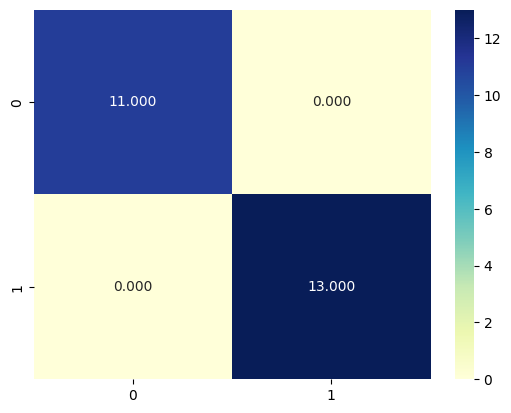

In [53]:
labels = [0,1]
sns.heatmap(Confusion_Matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [55]:
Model_DT.predict([[1,2,31,31,2,1,2,13,1,2,1,31,1,2,1]])

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)